# Build a Neural Netwrok for multi-classification of IRIS types

In [1]:
#pip install keras

In [2]:
#pip install tensorflow

In [3]:
# for reading data
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Load our data
- We use Iris Species as the example dataset

- Read the dataset
- Shuffle the dataset

In [4]:
# read in the data

df = pd.read_csv('Iris.csv')

df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:

# shuffle the dataset to prevent the model from learning any patterns that might exist in the order of the data.! 
df = df.sample(frac=1).reset_index(drop=True)
print(df)


      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0     36            5.0           3.2            1.2           0.2   
1    137            6.3           3.4            5.6           2.4   
2    144            6.8           3.2            5.9           2.3   
3     74            6.1           2.8            4.7           1.2   
4    106            7.6           3.0            6.6           2.1   
..   ...            ...           ...            ...           ...   
145   27            5.0           3.4            1.6           0.4   
146   25            4.8           3.4            1.9           0.2   
147  117            6.5           3.0            5.5           1.8   
148   96            5.7           3.0            4.2           1.2   
149   99            5.1           2.5            3.0           1.1   

             Species  
0        Iris-setosa  
1     Iris-virginica  
2     Iris-virginica  
3    Iris-versicolor  
4     Iris-virginica  
..               ... 

# Prepare data for modeling
- Split the data(X,y)
- Convert to NumPy array
- Encode class values as integers


In [6]:
# split into X and Y

Y = df['Species']
X = df.drop(['Species'], axis=1)

print(X)
print(X.shape)

print(Y)
print(Y.shape)


      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0     36            5.0           3.2            1.2           0.2
1    137            6.3           3.4            5.6           2.4
2    144            6.8           3.2            5.9           2.3
3     74            6.1           2.8            4.7           1.2
4    106            7.6           3.0            6.6           2.1
..   ...            ...           ...            ...           ...
145   27            5.0           3.4            1.6           0.4
146   25            4.8           3.4            1.9           0.2
147  117            6.5           3.0            5.5           1.8
148   96            5.7           3.0            4.2           1.2
149   99            5.1           2.5            3.0           1.1

[150 rows x 5 columns]
(150, 5)
0          Iris-setosa
1       Iris-virginica
2       Iris-virginica
3      Iris-versicolor
4       Iris-virginica
            ...       
145        Iris-setosa
14

In [7]:
# convert X to numpy arrays


X = np.array(X)

In [8]:

#show Y
print(Y)
Y.info
Y.head

0          Iris-setosa
1       Iris-virginica
2       Iris-virginica
3      Iris-versicolor
4       Iris-virginica
            ...       
145        Iris-setosa
146        Iris-setosa
147     Iris-virginica
148    Iris-versicolor
149    Iris-versicolor
Name: Species, Length: 150, dtype: object


<bound method NDFrame.head of 0          Iris-setosa
1       Iris-virginica
2       Iris-virginica
3      Iris-versicolor
4       Iris-virginica
            ...       
145        Iris-setosa
146        Iris-setosa
147     Iris-virginica
148    Iris-versicolor
149    Iris-versicolor
Name: Species, Length: 150, dtype: object>

In [9]:

# work with labels
# encode class values as integers
label = LabelEncoder()
print(label)


label.fit(Y)
label_Y = label.transform(Y)
print(label_Y)



LabelEncoder()
[0 2 2 1 2 0 1 1 0 1 0 1 0 2 2 1 0 1 0 0 0 1 1 1 0 1 2 1 2 2 2 0 2 1 2 2 0
 1 0 1 0 1 1 1 1 0 0 1 1 2 2 0 2 1 0 0 2 2 0 0 0 0 2 2 0 1 2 1 0 2 1 0 1 0
 1 2 0 1 2 2 0 1 0 0 1 1 2 2 0 2 1 1 2 2 1 1 1 0 1 0 0 0 2 0 2 2 1 2 1 1 2
 2 1 1 2 2 0 0 1 2 0 2 2 0 2 2 1 0 0 2 1 2 1 0 0 1 2 2 0 2 2 0 1 0 2 0 0 2
 1 1]


In [10]:

# convert integers to dummy variables (i.e. one hot encoded) ; use to_categorical()

y_dummy = np_utils.to_categorical(label_Y)
print(y_dummy)

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1.

# Build, Compile, Fit model
- Use the Sequential API to build your model
- Specify an optimizer (rmsprop or Adam)
- Set a loss function (categorical_crossentropy)
- EarlyStopping callbacks to prevent overfitting (patience of 10)
- Fit the model (make a new variable called ‘history’ so you can evaluate the learning curves)

In [11]:
# build a model with 1 or 2 layers and get summary of the model

model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), name='dense', activation='relu'))
model.add(Dense(3, activation='relu', name='dense_1'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                96        
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 147
Trainable params: 147
Non-trainable params: 0
_________________________________________________________________


In [12]:
# compile the model for multi-class classification
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [13]:
import keras
from keras.callbacks import EarlyStopping

# early stopping callback
# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
# now we just update our model fit call with 80/20 split
early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=10, 
                                   restore_best_weights=True)






history = model.fit(X,
                    y_dummy,
                    callbacks=[early_stopping_callback],
                    epochs=800000, # for setting a big number!
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/800000
12/12 [==============================] - 2s 38ms/step - loss: nan - accuracy: 0.3500 - val_loss: nan - val_accuracy: 0.3667
Epoch 2/800000
12/12 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3250 - val_loss: nan - val_accuracy: 0.3667
Epoch 3/800000
12/12 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3250 - val_loss: nan - val_accuracy: 0.3667
Epoch 4/800000
12/12 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3250 - val_loss: nan - val_accuracy: 0.3667
Epoch 5/800000
12/12 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3250 - val_loss: nan - val_accuracy: 0.3667
Epoch 6/800000
12/12 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3250 - val_loss: nan - val_accuracy: 0.3667
Epoch 7/800000
12/12 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3250 - val_loss: nan - val_accuracy: 0.3667
Epoch 8/800000
12/12 [===========

# Evaluate the Model
- Learning curves (Loss)
- Learning curves (Accuracy)
- Confusion matrix

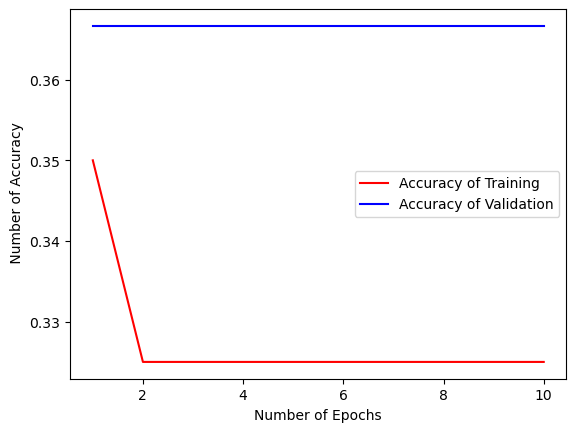

In [21]:

import matplotlib.pyplot as plt

history_directory = history



# learning curve
# accuracy
accuracy = history_directory['accuracy']
value_accuracy = history_directory['val_accuracy']




# loss
loss = history_directory['loss']
value_loss = history_directory['val_loss']



# range of X (no. of epochs)
num_epochs = range(1, len(accuracy) + 1)



# plot
# "r" is for "solid red line"
plt.plot(num_epochs, accuracy, 'r', label='Accuracy of Training')

# b is for "solid blue line"
plt.plot(num_epochs, value_accuracy, 'b', label='Accuracy of Validation')

plt.xlabel('Number of Epochs')
plt.ylabel(' Number of Accuracy')
plt.legend()

plt.show()




In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#see how the model did!
## i'm spreading that prediction across three nodes and they sum to 1
# sum it up! Should be 1
## [9.9999988e-01 1.3509347e-07 6.7064638e-16]
## 1.0
# Almost a perfect prediction
# actual is left, predicted is top
# names can be found by inspecting Y

prediction = model.predict(X) 
print(prediction[0])
print(np.sum(prediction[0]))


#showing matrix
matrix = confusion_matrix(y_dummy.argmax(axis=1), prediction.argmax(axis=1))

print(matrix)




5/5 [==============================] - 0s 2ms/step
[nan nan nan]
nan
[[50  0  0]
 [50  0  0]
 [50  0  0]]


In [50]:

# more detail on how well things were predicted
print(classification_report(y_dummy.argmax(axis=1), prediction.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.50      1.00      0.66        50
           2       0.00      0.00      0.00        50

    accuracy                           0.66       150
   macro avg       0.50      0.66      0.55       150
weighted avg       0.50      0.66      0.55       150



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
